<h3><center>

**NAME     :** *R AKHILANDESHWARI*

**REG NO   :** 2048046
*italicized text*

**TOPIC    :** *PANDAS IN PYTHON [EDULYTICS]*</h3></center>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h2><center><b>PROBLEM STATEMENT</b></center></h2>

<h6>
The University of Anybody Can Learn Datascience (ABCLD) wants to analyze which type of learning component are contributing effectively in the improvement of final scores of the students who have taken a three year PG Programme in Data Science under new education policy. I am sure you will come up with the solution which will benefit the university to take the final


<i><b>NOTE:</b></i>
You need to make use of Pandas to perform the EDULYTICS on the given academic dataset with the help of missing value imputation and regression analysis.
</h6>



<h4><b>.<center>FEW INSTRUCTIONS</center></h4></b>
<br>
Given dataset is a dummy dataset containing information related to Grades from a PG course at ABCD University. There are total 5 attributes Sem_enrolled,Tests,Coursera,GroupActivity and	FinalExam. FinalExam is the target variable.
<br>	
The recorded values are the average of sub-components: e.g The Tests, coursera and group activity variables are the average of all tests, coursera courses and group activities taken by students. The FinalExam variable is the average of all questions in the final, written exam.
<br>
The Sem_enrolled column is the year in which the student first enrolled at the university and is a crude approximation of the student's age (maturity).
<br>
This particular course permitted students to work in groups for assignments, tutorials and the take-home exam. The groups were self-selected, and varied during the semester.
<br>
Of interest is whether the assignments, tutorials, midterms or take-home exam are a good predictor of the student's performance in the final exam. 
Also, findout whether the sem_enrolled variable show any promise as a prediction variable? ---- <b> We can perform regression among Sem_enrolled and FinalExam</b><br>
<br>
Data shape:	100 rows and 5 columns <br>
Missing Value: YES<br><br><br>
<b><i>
Task to be performed: Missing value imputation and Regression. </b></i>

<center><h3><b><u>IMPUTING MISSING VALUES</b></u></h3><br><h4><i>Cleaning of Data</i></h4></center>



In [ ]:
EduData=pd.read_excel('/content/AcademicScoreDataset.xlsx')

In [ ]:
EduData.columns

Index(['Sem_enrolled', 'Tests', 'Coursera', 'GroupActivity', 'Final'], dtype='object')

In [ ]:
EduData.head()

,Sem_enrolled,Tests,Coursera,GroupActivity,Final
0,5,95.05,34.09,51.48,52.50
1,1,83.70,100.00,99.07,68.33
2,1,81.22,83.17,63.15,48.89
3,2,91.32,96.06,100.00,80.56
4,1,95.00,93.64,100.00,73.89


In [ ]:
EduData.isnull().sum()

Sem_enrolled     0
Tests            3
Coursera         3
GroupActivity    7
Final            6
dtype: int64

In [ ]:
#Filling Null values with 0
EDO=EduData.fillna(0) 
EDO.isnull().sum()

Sem_enrolled     0
Tests            0
Coursera         0
GroupActivity    0
Final            0
dtype: int64

In [ ]:
#Filling Null values using forward fill method
EDF=EduData.fillna(method='ffill')
EDF.isnull().sum()

Sem_enrolled     0
Tests            0
Coursera         0
GroupActivity    0
Final            0
dtype: int64

In [ ]:
#Filling Null values using backward fill method
EDB=EduData.fillna(method='bfill')
EDB.isnull().sum()

Sem_enrolled     0
Tests            1
Coursera         0
GroupActivity    0
Final            0
dtype: int64

<h4><b>INFERENCE:</b></h4>Since, the last row of the test contains the Null value. It is still remaining as Null. Similarly, if we use the first row contains null value and we use the ffill() then, we will still be remained with the null value. So, It's not appropriate to use ffill() and bfill(). And moreover, fillinf the null values with 0, will not result in a good prediction model. So, we have to use other Imputation Techniques for replacing the null values.

<center><h3><u>MEAN METHOD FOR IMPUTING THE NULL VALUES</u><h3></h3>

In [ ]:
EduDataNullValues= ['Tests', 'Coursera', 'GroupActivity', 'Final']
#Technique 1: Using mean to impute the missing values
for i in EduDataNullValues:
 EduData.loc[EduData.loc[:,i].isnull(),i]=EduData.loc[:,i].mean()

In [ ]:
EduData.isnull().sum()

Sem_enrolled     0
Tests            0
Coursera         0
GroupActivity    0
Final            0
dtype: int64

<center><h3><u>MEADIAN METHOD FOR IMPUTING THE NULL VALUES</u><h3></h3>

In [ ]:
EduDataNullValues= ['Tests', 'Coursera', 'GroupActivity', 'Final']
#Technique 1: Using mean to impute the missing values
for i in EduDataNullValues:
 EduData.loc[EduData.loc[:,i].isnull(),i]=EduData.loc[:,i].median()

In [ ]:
EduData.isnull().sum()

Sem_enrolled     0
Tests            0
Coursera         0
GroupActivity    0
Final            0
dtype: int64

In [ ]:
'''Worked with KNN, but got error...... Because, KNN is best suitable for imputing the values of categorical data'''

lis = []
for i in range(0, EduData.shape[1]):
     
    if(EduData.iloc[:,i].dtypes == 'object'):
        EduData.iloc[:,i] = pd.Categorical(EduData.iloc[:,i])
        #print(marketing_train[[i]])
        EduData.iloc[:,i] = EduData.iloc[:,i].cat.codes 
        EduData.iloc[:,i] = EduData.iloc[:,i].astype('object')
         
        lis.append(EduData.columns[i])

#Apply KNN imputation algorithm
#EduDataK = pd.DataFrame(KNN(k = 3).fit_transform(EduData)),columns = EduData.columns)
KNN=KNeighborsClassifier()
EduDataK= pd.DataFrame(KNN.fit_transform(EduData), columns = EduData.columns)


<center><h3><u>DATA VISUALIZATION</u></h3></center>

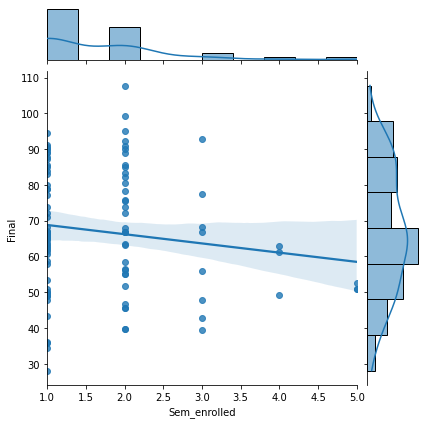

In [ ]:
sns.jointplot(x=EduData['Sem_enrolled'], y=EduData['Final'], data=EduData, kind='reg')

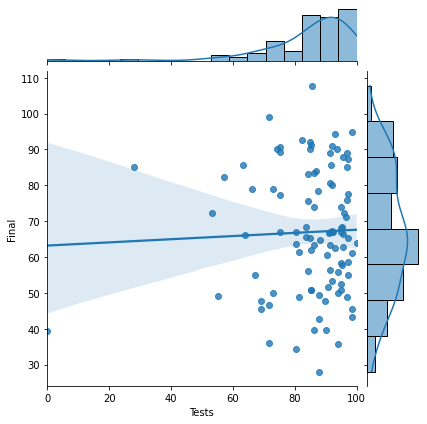

In [ ]:
sns.jointplot(x=EduData['Tests'], y=EduData['Final'], data=EduData, kind='reg')

#Sem_enrolled	Tests	Coursera	GroupActivity	Final

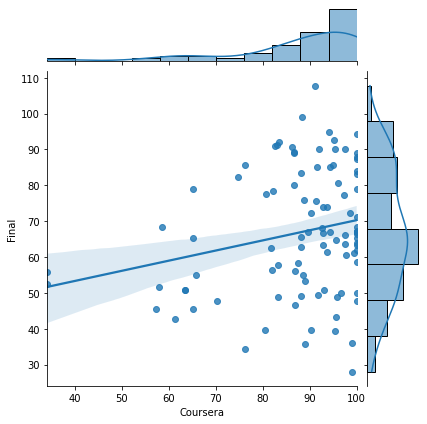

In [ ]:
sns.jointplot(x=EduData['Coursera'], y=EduData['Final'], data=EduData, kind='reg')

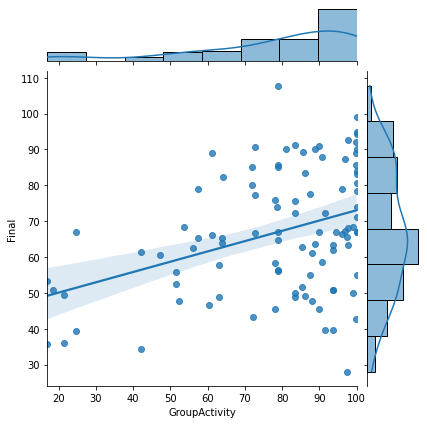

In [ ]:
sns.jointplot(x=EduData['GroupActivity'], y=EduData['Final'], data=EduData, kind='reg')

<h4><b>INFERENCE:</b></h4> The year of Semester enrolled,coursera and Group Activity doesnot  effect the final of the Student. Only, tests effect the final result of the stdent.<br>
